In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/atharv/Downloads/Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=['Serial No.'],inplace=True)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [15]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
398,312,103,3,3.5,4.0,8.78,0
125,300,100,3,2.0,3.0,8.66,1
328,324,112,4,4.0,3.5,8.77,1
339,324,107,5,3.5,4.0,8.66,1
172,322,110,4,4.0,5.0,9.13,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
41,316,105,2,2.5,2.5,8.20,1
180,300,104,3,3.5,3.0,8.16,0
132,309,105,5,3.5,3.5,8.56,0


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='linear'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [35]:
history= model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 0.2509 - val_loss: 0.2101
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 0.1821 - val_loss: 0.1451
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1316 - val_loss: 0.0927
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0799 - val_loss: 0.0561
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0468 - val_loss: 0.0345
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0331 - val_loss: 0.0254
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0246 - val_loss: 0.0234
Epoch 8/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0214 - val_loss: 0.0233
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0210 - val_loss: 0.0226
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0202 - val_loss: 0.0216
Epoch 11/100
8/8 [======

8/8 [==============================] - 0s 5ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 85/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0054 - val_loss: 0.0047
Epoch 86/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 87/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0060 - val_loss: 0.0047
Epoch 88/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 89/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0063 - val_loss: 0.0045
Epoch 90/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 91/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 92/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 93/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 94/100
8/8 [===============

In [36]:
y_pred = model.predict(x_test_scaled)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7585710764603426

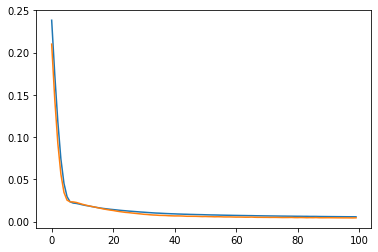

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])